# The real estate marketing research 


## Project Description

Research analysis and data preprocessing for a dataset with advertisements for selling apartments in St. Petersburg have been carried out. The influence of the area, ceilings, the number of rooms, and the date of announcement on the prices of apartments in all the presented settlements and the center of St. Petersburg for constructing an automated system for determining costs to avoid fraud and anomalies were revealed. Based on data from "Yandex.Real Estate" service, the market value of various types of real estate and typical parameters of apartments, depending on the distance from the center, was determined. Data preprocessing has been done, and added new data. We have constructed histograms, boxplots, and scatter diagrams.

## Column Descriptions

**airports_nearest** — distance to the nearest airport (meters)

**balcony** — number of balconies/verandas 

**ceiling_height** — ceiling height (meters)

**cityCenters_nearest** — distance to the city centre (meters)

**days_exposition** — total days of the emergence of advertising

**first_day_exposition** — first day of the emergence of advertising

**floor** — floor number

**floors_total** — total floor number

**is_apartment** — is it apartment or not (Bool)

**kitchen_area** — kitchen area (meters²)

**last_price** — the last price of the real estate

**living_area** — living area (meters²)

**locality_name** — name of the settlement (big cities, villages, suburb in Saint-Petersburg district)

**open_plan** — open plan (Bool)

**parks_around3000** — number of parks within 3 km

**parks_nearest** — distance to the nearest park (meters)

**ponds_around3000** — number of ponds within 3 km

**ponds_nearest** — distance to the nearest ponds (meters)

**rooms** — number of rooms

**studio** — is it a studio or not (Bool)

**total_area** — total area (meters²)

**total_images** — number of real estate images

## 1. Read CSV and import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### General information about  DataFrame. Histograms

In [3]:
data.info()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

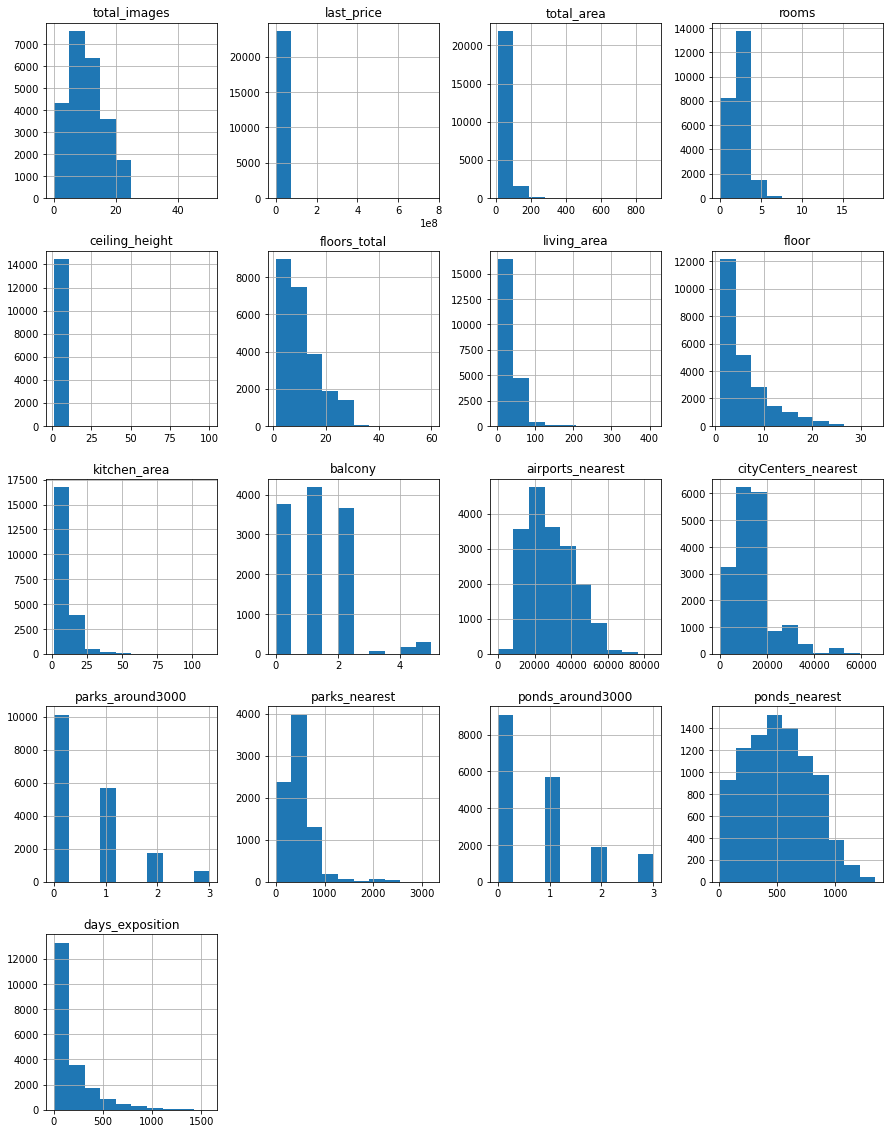

In [4]:
data.hist(figsize=(15, 20))
plt.show()

### 2. Data preparation

In [5]:
data.isna().sum() # check Na

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### 2.1 Check of missing values  as a percentage

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### 2.2 Fill NA/NaN values

In [7]:
data['balcony'] = data['balcony'].fillna(0) #missing values replacement 

In [8]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) #заполнили пропуски медианным значением

### 2.3 Name of the settlement classification 

The Russian language provides native speakers the opportunity to record the names of settlements in different ways. For instance, the suburb or village can be called in 3 or 4 different ways. It stems from Soviet Union's legacy. Thus, we should classify them as a 'village' for follow-up analysis.

In [9]:
print(data['locality_name'].unique()) #analysis of unique values for unification

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [10]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(data.locality_name.unique())


334

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской посёлок Большая Ижора,NaN,13098.5,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,13098.5,NaN,NaN,NaN,NaN,27.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,13098.5,NaN,NaN,NaN,NaN,28.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,13098.5,NaN,NaN,NaN,NaN,71.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,Волхов,NaN,13098.5,NaN,NaN,NaN,NaN,NaN
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


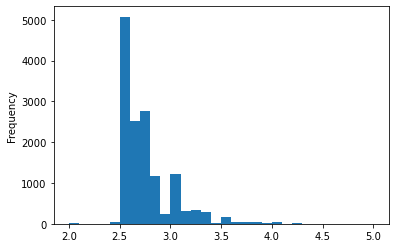

In [11]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)

### 2.4 Fill NA/NaN values.  Cast an object to a specified dtype

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False) # missing values replacement by False

In [13]:
data['last_price'] = data['last_price'].astype('int') #data type recast from float to int
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [14]:
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].head(10))

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int64


### 2.5 Drop of the artifact 

In [15]:
def ceiling_height_filter(i):
    if i >= 20:
        i = i/10
    return i 
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_filter)
print(data['ceiling_height'].max())

14.0


In [16]:
data.duplicated().sum() #Duplicates check

0

### 2.6 Subsidiary Conclusions: data preparation

**The cause-and-effect of missing values**:

- Human factor. Landlords needed to fill in more data. For instance, it can be assumed that if the user did not indicate that he has a balcony (there is a pass), landlords do not have it in the apartments. There were also many gaps found in the "apartments" section. Many Russian users did not recognize the value of this parameter and did not check it.
The design of the data-filling form can be attributed to the technical factor. For example, there were duplicate data and different spellings of settlements.

- An error was also found in the "ceiling_height" column - unrealistic values were specified (25/32 m). There is an assumption that the data set was incorrectly formatted during data processing. It also applies to the human factor.

**The reasons for the data type change**:

We changed the data type in the "last_price" column from float to int for ease of use. It is customary to perceive prices as an integer rather than an actual numbers.

## 3. The exploratory data analysis

### 3.1  Add new columns with the following options to the Data set:


- the price of one square meter;

- day of the week when the advertising was published (0 — Monday, 1 — Tuesday, and so on);

- month of publication of the announcement;

- year of publication of the announcement;

- apartment floor type (values — “first”, “last”, “other”);

- distance to the city center in kilometers (convert from meters to kilometers).

In [17]:
data['price_per_m3'] = data['last_price'] / data['total_area'] #цthe price of one square meter
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #format date
data['day_of_publication'] = data['first_day_exposition'].dt.weekday #day of advertising emergence
data['month_of_publication'] = data['first_day_exposition'].dt.month #month of advertising emergence
data['year_of_publication'] = data['first_day_exposition'].dt.year #year of advertising emergence
def floor_category(row): 
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
      
data['floor_category'] = data.apply(floor_category, axis = 1) 


In [18]:
#distance to the city center in kilometers (convert from meters to kilometers)
data['cityCenters_nearest'] = np.round(data['cityCenters_nearest'] / 1000) 

### 3.2 Research of the following parameters:
- total area;

- living area;

- kitchen area;

- the price of the real estate;

- the number of rooms;

- ceiling height;

- floor of the apartment;

- floor type of the apartment (“first”, “last”, “other”);

- the total number of floors in the buildings;

- distance to the city center in meters;

- distance to the nearest airport;

- distance to the nearest park;

- day and month of publication of advertising emergence.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

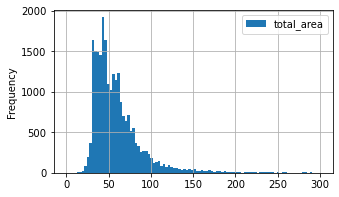

In [19]:
#total area 

data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,300))
data['total_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

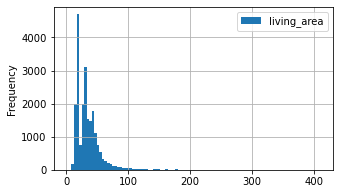

In [20]:
#living area

data
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,410))
data['living_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

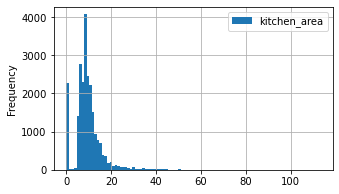

In [21]:
#kitchen area

data
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,113))
data['kitchen_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

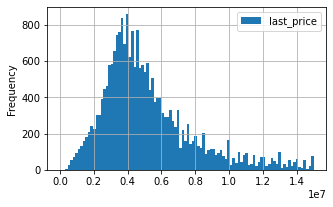

In [22]:
#last price per appartment 

data
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,15000000))
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

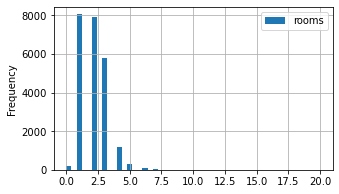

In [23]:
#rooms
data
data.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,20))
data['rooms'].describe()

count    23699.000000
mean         1.670544
std          1.353476
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

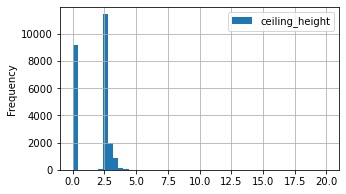

In [24]:
#ceiling height
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,20))
data['ceiling_height'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

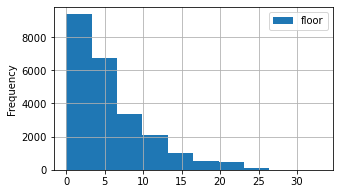

In [25]:
#floor
data
data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,33))
data['floor'].describe()

count    23616.000000
mean         2.611704
std          0.696117
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: floor_category, dtype: float64

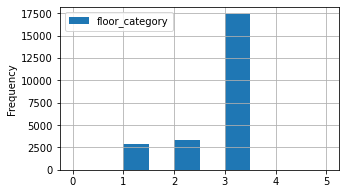

In [26]:
#type of floor
data['floor_category'].fillna(0)
def categorize_floor(floor):
    try:
        if 'первый' in floor:
            return 1
        elif 'последний' in floor:
            return 2
        elif 'другой' in floor:
            return 3
    except:
            return floor
data['floor_category'] = data['floor_category'].apply(categorize_floor)
data
data.plot(y = 'floor_category', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,5))
data['floor_category'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

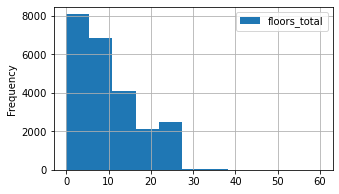

In [27]:
# total number of floors
data
data.plot(y = 'floors_total', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,60))
data['floors_total'].describe()

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

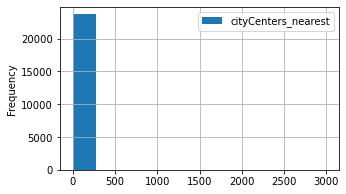

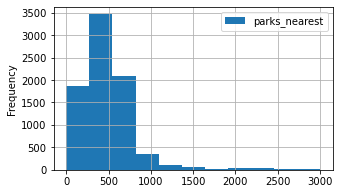

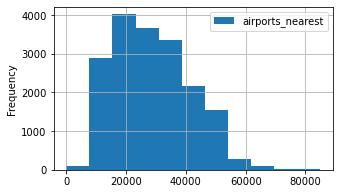

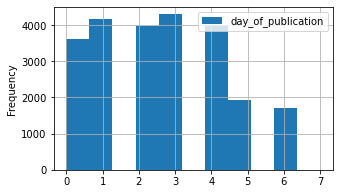

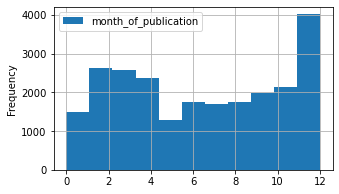

In [28]:
#distance to the city center in meters

data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,3000))
data['cityCenters_nearest'].describe()
#distance to the nearest park
data
data.plot(y = 'parks_nearest', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,3000))
data['parks_nearest'].describe()
#distance to the nearest airport
data
data.plot(y = 'airports_nearest', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,84869))
data['airports_nearest'].describe()
#day and month of ad.
data
data.plot(y = 'day_of_publication', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,7))
data['day_of_publication'].describe()

data
data.plot(y = 'month_of_publication', kind = 'hist', bins = 11, grid=True, figsize = (5,3), range = (0,12))
data['month_of_publication'].describe()




### Subsidiary Conclusions

- The total area varies from 0 to 200 meters. The distribution seems to be normal

- Kitchen area varies from 0 to 20 meters

- Commonly number of rooms is 2

- The median ceiling height is 2.5 meters. There are outliers in the data.

- Data on the floors in the house also seems to be adequate

- Faced with the problem of assessing the type of floor of the apartment. The data (str) is not rendered, the method of assigning a number to each category did not work


### 4 The analysis of sales speed 

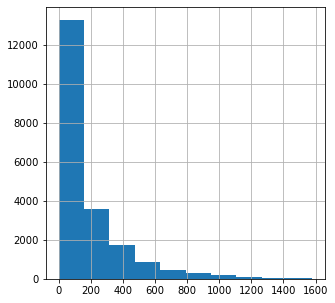

In [29]:
data['days_exposition'].hist(figsize=(5, 5));

In [30]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Fastest sales - about 45 days, long - from 232 to 1580 days


## 5 Plotting the separate histograms for each of these parameters: 

- the dependence of the price on the above parameters

- the average price of one square meter in 10 locations with the largest number of ads

- the settlements with the highest and lowest cost per square meter

- the average price per kilometer

### 5.1 Correlation between price and total area

0.6536750579657242

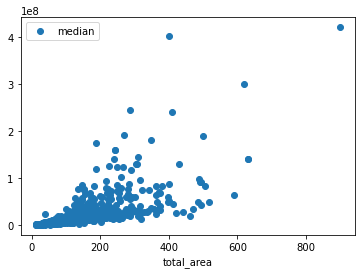

In [31]:
pt_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area.plot(y = 'median', style = 'o')

pt_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

There is no strong correlation between price and total area

### 5.2 Correlation between price and living area

0.5664915336952653

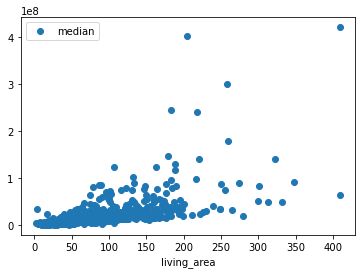

In [32]:
pt_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_living_area.columns = ['mean', 'count', 'median']
pt_living_area.plot(y = 'median', style = 'o')

pt_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

The positive correlation between variables is weak

### 5.3 Correlation between price and number od rooms

0.3633428499648955

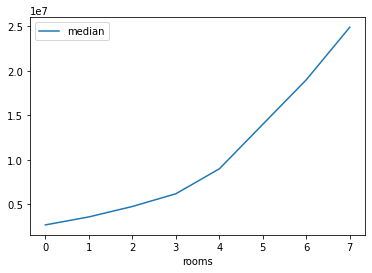

In [33]:
pt_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms.query('count > 50').plot(y = 'median')

pt_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

The closer the number of rooms to 3, the lower the cost per square meter. It stems from the fact that 1-2-room apartments are the most popular in Russia. 

### 5.4 Correlation between price and proximity to the city center

-0.19033353688663499

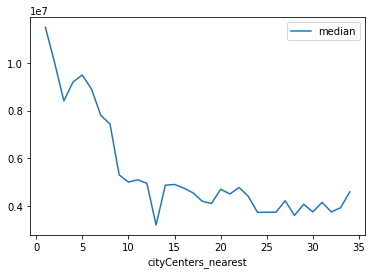

In [34]:
pt_cityCenters_nearest = data.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_cityCenters_nearest.columns = ['mean', 'count', 'median']
pt_cityCenters_nearest.query('count > 100').plot(y = 'median')

pt_cityCenters_nearest.query('count > 100').sort_values('median', ascending = False)

data['cityCenters_nearest'].corr(data['last_price'])

We can obtain negative correlation. The smaller distance to the center, the more expensive the price per square meter.

In [35]:
data['cityCenters_nearest'].describe()

count    23699.000000
mean        13.908899
std          7.563081
min          0.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

### 5.5 Correlation between price and proximity to the park

-0.016413927453985948

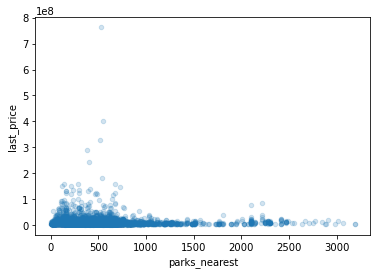

In [36]:
data.plot(kind = 'scatter', y = 'last_price', x = 'parks_nearest', alpha = 0.2)

data['parks_nearest'].corr(data['last_price'])

Proximity to the park raises the price of the appartment

### 5.6 Correlation between price and floor category

,mean,count,median
floor_category,,,
3.0,6.674074e+06,17363,4850000
2.0,7.361025e+06,3336,4300000
1.0,4.803560e+06,2917,3900000


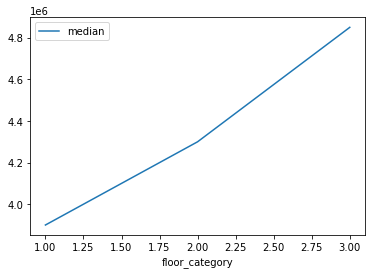

In [37]:
pt_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_floor_category.columns = ['mean', 'count', 'median']
pt_floor_category.plot(y = 'median')

pt_floor_category.sort_values('median', ascending = False)

1 – the first floor 

2 – the last floor

3 – other

To sum up, the first floor is cheaper than the last one. We have an assumption that the sample contains penthouse, considered as elite real estate 

### 5.7 Correlation between price and the day/month/year of advertising publication

,mean,count,median
year_of_publication,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


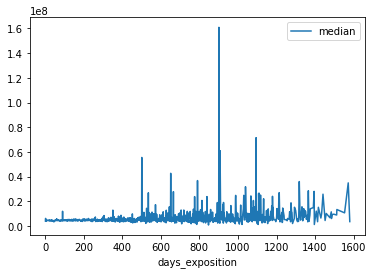

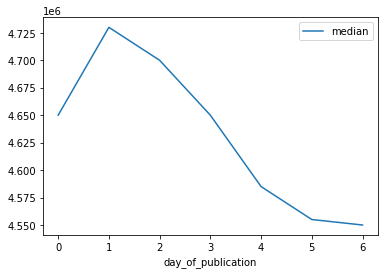

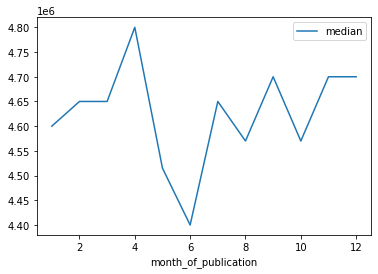

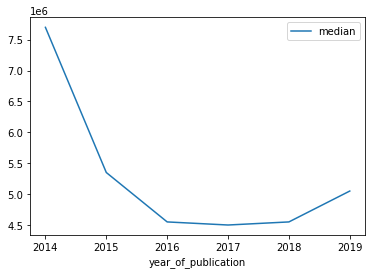

In [38]:
data['days_exposition'].corr(data['last_price'])
pt_days_exposition = data.pivot_table(index = 'days_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_days_exposition.columns = ['mean', 'count', 'median']
pt_days_exposition.plot(y = 'median')

pt_days_exposition.sort_values('median', ascending = False)

data['day_of_publication'].corr(data['last_price'])
pt_day_of_publication = data.pivot_table(index = 'day_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_day_of_publication.columns = ['mean', 'count', 'median']
pt_day_of_publication.plot(y = 'median')

pt_days_exposition.sort_values('median', ascending = False)

data['month_of_publication'].corr(data['last_price'])
pt_year_of_publication = data.pivot_table(index = 'month_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_year_of_publication.columns = ['mean', 'count', 'median']
pt_year_of_publication.plot(y = 'median')

pt_year_of_publication.sort_values('median', ascending = False)
data['year_of_publication'].corr(data['last_price'])
pt_year_of_publication = data.pivot_table(index = 'year_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_year_of_publication.columns = ['mean', 'count', 'median']
pt_year_of_publication.plot(y = 'median')

pt_year_of_publication.sort_values('median', ascending = False)


### 5.8 Correlation between price and the kitchen area

0.38644378419384234

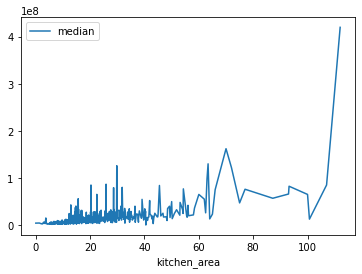

In [39]:
data['kitchen_area'].corr(data['last_price'])
pt_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_kitchen_area.columns = ['mean', 'count', 'median']
pt_kitchen_area.plot(y = 'median');
data['kitchen_area'].corr(data['last_price'])

More expensive sq. meter is observed in March-April and August. The most costly ads were posted on Tuesday. There may be a certain seasonality in the sale of apartments during these periods. The price per square meter fell in 2016-2017, but it began to rise again after this period. By the number of days the ad is published, it is difficult to judge how the number of days when the ad "hangs" depends on the cost per square meter. The published advertisements for 800-1000 days fell into a period when there was a sharp rise in the price of apartments and inflation. Let's analyze which apartments sold faster.


### 5.9 Correlation between price and location

In [40]:
locality_pt = data.pivot_table(index = 'locality_name', values = 'price_per_m3', aggfunc=['count', 'mean'])
locality_pt.columns = ['count', 'mean']
locality_pt = locality_pt.sort_values('count', ascending = False).head(10)
locality_pt
#самая высокая стоимость
locality_pt[locality_pt['mean']==locality_pt['mean'].max()]
#самая низкая стоимость
locality_pt[locality_pt['mean']==locality_pt['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909153


The most expensive apartments are in St. Petersburg, and the cheapest - are in Vyborg.

In [41]:
locality_pt = data.pivot_table(index = 'locality_name', values = 'price_per_m3', aggfunc=['count', 'mean', 'median'])
locality_pt.columns = ['count', 'mean', 'median']
top_locals  = locality_pt.sort_values('count', ascending = False).head(10)
print(top_locals)

                   count           mean         median
locality_name                                         
Санкт-Петербург    15721  114849.008794  104761.904762
посёлок Мурино       556   85681.762601   85878.462169
посёлок Шушары       440   78677.364217   76876.172608
Всеволожск           398   68654.473986   65789.473684
Пушкин               369  103125.819291  100000.000000
Колпино              338   75424.579098   74723.748474
посёлок Парголово    327   90175.913458   91642.857143
Гатчина              307   68746.146763   67796.610169
деревня Кудрово      299   92473.547576   91860.465116
Выборг               237   58141.909153   58158.319871


Here we have calculated the top locations by price per square meter. The average cost (median) per square meter in St. Petersburg is 104 thousand rubles. In Vyborg - 58158.

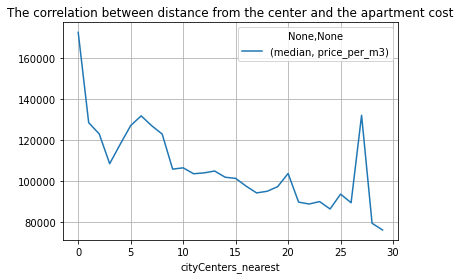

In [42]:
cost_per_km_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest', values = 'price_per_m3', aggfunc=['median'])

cost_per_km_spb.plot(grid = True, title = 'The correlation between distance from the center and the apartment cost');


Apartments in the center are located within a radius of 3-4 km. Let's calculate the cost of each km in St. Petersburg.

In [43]:
pt_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest !=999999').pivot_table(index = 'cityCenters_nearest', values = 'price_per_m3', aggfunc = 'mean')

pt_km

,price_per_m3
cityCenters_nearest,
0.0,245833.530289
1.0,177005.407676
2.0,157849.007329
3.0,121387.453704
4.0,133282.874761
5.0,140509.789046
6.0,151012.193621
7.0,156176.879664
8.0,125671.442742


### Conclusion

We analyzed data from "Yandex.Real Estate" in St. Petersburg and the region. Based on the data, we managed to collect an image of the most common apartments in the region:

- The total area varies from 0-200 meters, and the median is 60 square meters. The median living area is 30 square meters. The average number of rooms is 2. It is noteworthy that the price per square meter in apartments with three rooms is the cheapest. One-room apartments are the most popular, so demand increases the cost per square meter. Generally, the height of the ceilings in the apartment is about 2.5 meters.

- The most expensive apartments in the region are located in St. Petersburg, and the cheapest - are in Vyborg. It may be due to the fact that Vyborg is located far from the metropolis, the economic center of the region. Because of this, the price per square meter becomes the lowest.

- The most expensive apartments were sold in March-April and August based on the cost per sq. meters. Also, there is an increase in the price of flats, which was published on Tuesday. Perhaps there is a certain seasonality in the sale of apartments during these periods. The price per square meter fell in 2016-2017, but it began to rise again after this period. By the number of days the ad is published, it is difficult to judge how the number of days when the ad "hangs" depends on the cost per square meter. It can be assumed that the advertisements that were put up for 800-1000 days fell into a period when there was a sharp rise in the cost of apartments and inflation.

- A quick sale of an apartment can be considered one that lasted less than 100 days. It is impossible to say precisely how realistic these data are.

- We also noticed a relationship between the proximity to the center of St. Petersburg and the cost per square meter. The further the object, the cheaper it is.

- The cost of apartments also depends on the area of the kitchen. The larger it is, the higher the price.


### How we achieved the result:

1. We reviewed the data, studied the gaps - replaced them.

2. We did pre-processing, visualized the results.

3. We revealed a correlation between the target parameters and the price of an apartment.

4. Tracked trends in the region using pivot tables and visualizations